In [1]:
import uproot
import gc
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
features = ["h_pt","h_eta","h_phi","h_deta","h_dphi","mueta_1",
            "mueta_2","ncentJets","njets","mjj_1","mjj_2",
            "detajj_1","detajj_2","nbtagJets","metpt","h_mass","mclabel"]

In [16]:
features = ["h_mass","h_eta","mueta_1","mueta_2"]

In [17]:
ggh = uproot.open("ntupleFiles/GluGluHToMuMu_M125_13TeV_amcatnloFXFX_pythia8.root")["ntupledData"]
gghdf = ggh.pandas.df(features)
gghdf = gghdf.loc[(gghdf['h_mass'] > 100) & (gghdf['h_mass'] < 150)]
del ggh
gc.collect()

6901

In [18]:
dy = uproot.open("ntupleFiles/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8.root")["ntupledData"]
dydf = dy.pandas.df(features)
dydf = dydf.loc[(dydf['h_mass'] > 100) & (dydf['h_mass'] < 150)]
del dy
gc.collect()

1150

In [19]:
tth = uproot.open("ntupleFiles/ttHToMuMu_M125_TuneCP5_13TeV-powheg-pythia8.root")["ntupledData"]
tthdf = tth.pandas.df(features)
tthdf = tthdf.loc[(tthdf['h_mass'] > 100) & (tthdf['h_mass'] < 150)]
del tth
gc.collect()

694

In [20]:
vbf = uproot.open("ntupleFiles/VBFHToMuMu_M125_13TeV_amcatnlo_pythia8.root")["ntupledData"]
vbfdf = vbf.pandas.df(features)
vbfdf = vbfdf.loc[(vbfdf['h_mass'] > 100) & (vbfdf['h_mass'] < 150)]
del vbf
gc.collect()

918

In [21]:
frames = [gghdf, dydf, tthdf, vbfdf]
fullFrame = pd.concat(frames, ignore_index=True)

In [22]:
import matplotlib.pyplot as plt

In [29]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.colorbar(cax)
    plt.savefig('test.png')

In [30]:
fullFrame.drop(['h_eta'],1).corr()

,h_mass,mueta_1,mueta_2
h_mass,1.000000,-0.001999,-0.002065
mueta_1,-0.001999,1.000000,0.552442
mueta_2,-0.002065,0.552442,1.000000


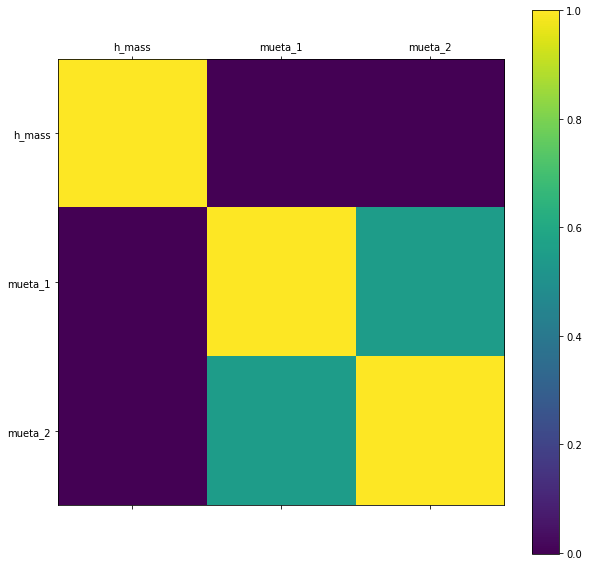

In [31]:
plot_corr(fullFrame.drop(['h_eta'],1))

In [8]:
fullFrame['label'] = pd.get_dummies(fullFrame.mclabel).values.tolist()

In [9]:
fullFrame = fullFrame.drop(['mclabel','h_mass'],1)

In [10]:
# shuffle the data then split
fullFrame = shuffle(fullFrame).reset_index(drop=True)

In [11]:
trainDF, testDF = train_test_split(fullFrame, test_size=0.2)
trainDF = trainDF.reset_index(drop=True)
testDF = testDF.reset_index(drop=True)

In [12]:
print(len(trainDF),len(testDF))


2365667 591417


In [13]:
# preprocess (normalize) only training set!!
## and save the result to use for test set later!
cols = trainDF.drop('label',1).columns
x = trainDF.drop('label',1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# later use min_max_scaler.transform() 
scaler_file = "hmumuScaler.save"
joblib.dump(min_max_scaler,scaler_file)

['hmumuScaler.save']

In [14]:
label = trainDF.label

In [15]:
trainDF = pd.DataFrame(x_scaled,columns=cols)
# fullFrame['label']=label

In [16]:
trainDF['label']=label

In [17]:
trainDF[trainDF.isnull().any(axis=1)]

,h_pt,h_eta,h_phi,h_deta,h_dphi,mueta_1,mueta_2,ncentJets,njets,mjj_1,mjj_2,detajj_1,detajj_2,nbtagJets,metpt,label


In [18]:
trainDF.to_pickle("trainingDF.pkl")
testDF.to_pickle("testingDF.pkl")